In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
df_ROSF = pd.read_csv('../../datasets/RecurrenceOfSurgery_Final.csv')
df_ROSF[:2]

,Unnamed: 0,환자ID,신장,체중,연령,성별,Large Lymphocyte,우울증여부,종양진행여부,재발여부,...,디스크위치,척추이동척도,척추전방위증,수술시간,수술실패여부,수술기법,흡연여부,Instability,혈액형,입원기간
0,0,1PT,163,60.3,66,2,22.8,0,0,0,...,4,Down,0,68.0,0,TELD,0,0,RH+A,2
1,1,2PT,171,71.7,47,1,44.9,0,0,0,...,4,Up,0,31.0,0,TELD,0,0,RH+A,1


In [3]:
df_ROSF.columns

Index(['Unnamed: 0', '환자ID', '신장', '체중', '연령', '성별', 'Large Lymphocyte',
       '우울증여부', '종양진행여부', '재발여부', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '수술시간', '수술실패여부', '수술기법', '흡연여부', 'Instability', '혈액형', '입원기간'],
      dtype='object')

## SA
- '연령','Large Lymphocyte','종양진행여부','디스크단면적','척추이동척도','수술시간','수술기법','Instability','혈액형'

#### 연령-입원기간
- 연속-연속? scatter??
- 연령은 입원기간에 영향을 미치지 않는 것으로 보여짐. 
    - 입원기간 4주 이하에서 50대가 많이 입원하는것으로 보여짐
    - 입원기간 4주 초과에서 오히려 30대, 60대 많이 입원하는 것으로 보여짐 (직업 or 생활환경에 영향을 많이 받았을거같은..)

In [4]:
## 입원기간의 value count로 했을때 범위를 끊어서 분석하고 싶음. 
df_ROSF['입원기간'].describe()

count    1758.000000
mean        1.651308
std         1.893471
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        46.000000
Name: 입원기간, dtype: float64

In [5]:
Q1_in = df_ROSF['입원기간'].describe()['25%']
Q3_in = df_ROSF['입원기간'].describe()['75%']
IQR_in = Q3_in-Q1_in

In [6]:
up = Q3_in + 1.5 *IQR_in
down = Q1_in - 1.5 *IQR_in
down, up

(-0.5, 3.5)

In [7]:
## 입원기간 4주 이하
condition = (df_ROSF['입원기간'] <= 4)
df_ROSF_in = df_ROSF[condition]

<Axes: xlabel='연령', ylabel='입원기간'>

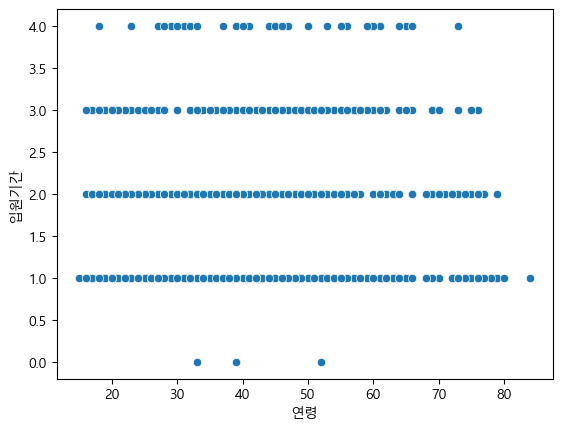

In [8]:
sns.scatterplot(data=df_ROSF_in, x='연령', y='입원기간')

In [9]:
df_ROSF_in[['입원기간', '연령']].corr()

,입원기간,연령
입원기간,1.000000,0.075214
연령,0.075214,1.000000


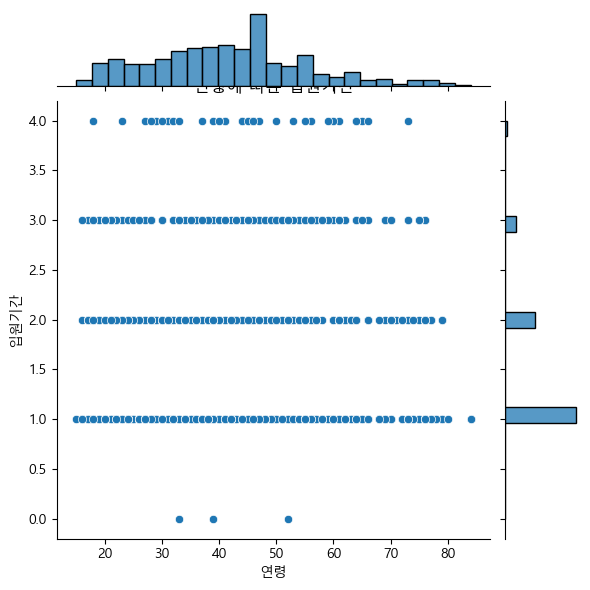

In [10]:
sns.jointplot(data=df_ROSF_in, x='연령', y='입원기간',)
plt.title('연령에 따른 입원기간')
plt.show()

In [11]:
df_ROSF_in_pivot = pd.pivot_table(data=df_ROSF_in, index='연령',  aggfunc=len)
df_ROSF_in_pivot['4주이하입원연령추세']=df_ROSF_in_pivot.index

In [12]:
df_ROSF_in_pivot

,Instability,Large Lymphocyte,Unnamed: 0,디스크단면적,디스크위치,성별,수술기법,수술시간,수술실패여부,신장,...,입원기간,재발여부,종양진행여부,척추이동척도,척추전방위증,체중,혈액형,환자ID,흡연여부,4주이하입원연령추세
연령,,,,,,,,,,,,,,,,,,,,,
15,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,15
16,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,16
17,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,17
18,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,18
19,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,77
78,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,78
79,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,79


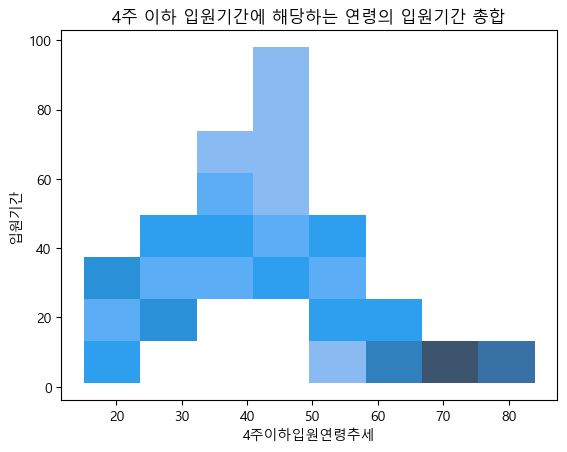

In [13]:
sns.histplot(data=df_ROSF_in_pivot, x='4주이하입원연령추세', y='입원기간')
plt.title('4주 이하 입원기간에 해당하는 연령의 입원기간 총합')
plt.show()

In [14]:
df_ROSF_in_pivot[['입원기간', '4주이하입원연령추세']].corr()

,입원기간,4주이하입원연령추세
입원기간,1.000000,-0.411798
4주이하입원연령추세,-0.411798,1.000000


In [15]:
## 입원기간 4주 초과 
conditions = (df_ROSF['입원기간'] > 4)
df_ROSF_inover = df_ROSF[conditions]

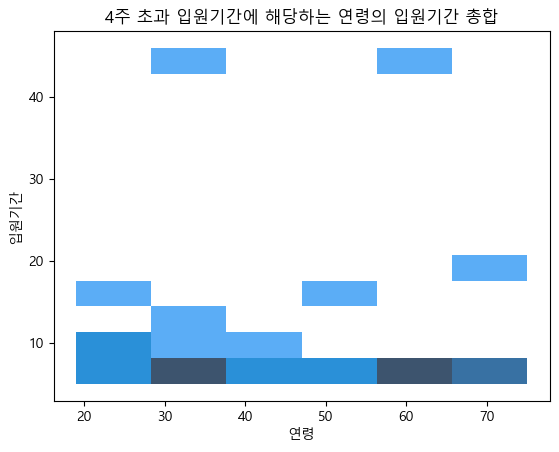

In [16]:
sns.histplot(data=df_ROSF_inover, x='연령', y='입원기간')
plt.title('4주 초과 입원기간에 해당하는 연령의 입원기간 총합')
plt.show()

In [17]:
df_ROSF_inover[['입원기간', '연령']].corr()

,입원기간,연령
입원기간,1.000000,-0.060015
연령,-0.060015,1.000000


#### Large Lymphocyte-입원기간
- 연속-연속?
- 림프구 수와 입원기간은 연관성이 보이지 않음. 
        - 림프수 중앙값 이상만 filter해도 입원기간과는 무관해보임. 

In [18]:
df_ROSF['Large Lymphocyte'].describe()

count    1758.000000
mean       39.291809
std        13.689167
min         0.000000
25%        30.600000
50%        40.200000
75%        48.575000
max        89.000000
Name: Large Lymphocyte, dtype: float64

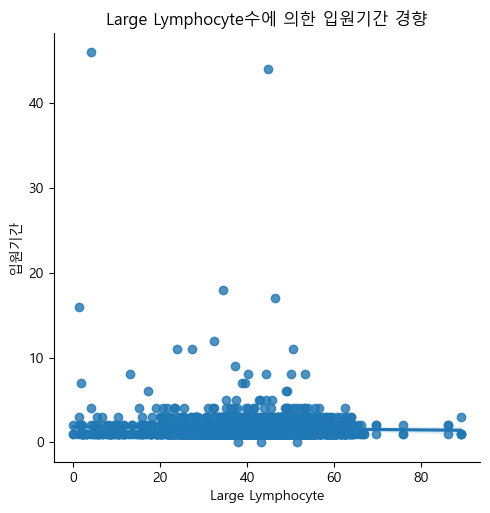

In [19]:
sns.lmplot(data=df_ROSF, x='Large Lymphocyte', y='입원기간',)
plt.title('Large Lymphocyte수에 의한 입원기간 경향')
plt.show()

In [20]:
df_ROSF[['Large Lymphocyte','입원기간']].corr()

,Large Lymphocyte,입원기간
Large Lymphocyte,1.000000,-0.034898
입원기간,-0.034898,1.000000


In [21]:
Q1_L = df_ROSF['Large Lymphocyte'].describe()['25%']
Q3_L = df_ROSF['Large Lymphocyte'].describe()['75%']
QM_L = df_ROSF['Large Lymphocyte'].describe()['50%']
IQR_L = Q3_L-Q1_L
Q1_L, Q3_L , IQR_L, QM_L

(30.6, 48.575, 17.975, 40.2)

In [22]:
up_L = Q3_L + 1.5 *IQR_L
down_L = Q1_L - 1.5 *IQR_L
down_L, up_L

(3.6374999999999993, 75.53750000000001)

In [23]:
## 조건을 걸어버림_bound보다 위 filter
condition_L=(df_ROSF['Large Lymphocyte'] >= QM_L)
df_ROSF_L = df_ROSF[condition_L]
df_ROSF_L

,Unnamed: 0,환자ID,신장,체중,연령,성별,Large Lymphocyte,우울증여부,종양진행여부,재발여부,...,디스크위치,척추이동척도,척추전방위증,수술시간,수술실패여부,수술기법,흡연여부,Instability,혈액형,입원기간
1,1,2PT,171,71.7,47,1,44.9,0,0,0,...,4,Up,0,31.0,0,TELD,0,0,RH+A,1
2,2,3PT,178,77.1,39,1,53.0,0,0,0,...,4,Down,0,78.0,0,TELD,0,0,RH+B,1
3,3,4PT,174,74.2,40,1,54.7,0,0,0,...,4,Down,0,73.0,0,TELD,0,0,RH+O,1
4,4,5PT,183,80.7,42,1,53.8,0,0,0,...,4,Up,0,29.0,0,TELD,0,0,RH+A,2
7,7,8PT,183,81.2,55,1,43.8,1,0,0,...,4,Middle,0,85.0,0,TELD,1,0,RH+B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,1845,1846PT,171,68.0,59,1,43.8,0,0,0,...,2,Middle,0,60.0,0,TELD,0,0,RH+AB,4
1750,1849,1850PT,167,57.0,43,2,47.4,0,0,0,...,5,Middle,0,30.0,0,IELD,1,0,RH+A,2
1751,1865,1866PT,151,56.0,64,2,43.0,0,0,0,...,4,Extremely down,0,20.0,0,IELD,0,1,RH+A,2
1752,1866,1867PT,183,104.0,42,1,48.7,0,0,1,...,5,Middle,0,145.0,0,IELD,1,0,RH+B,2


In [24]:
df_ROSF_L[['Large Lymphocyte','입원기간']].corr()

,Large Lymphocyte,입원기간
Large Lymphocyte,1.000000,-0.036906
입원기간,-0.036906,1.000000


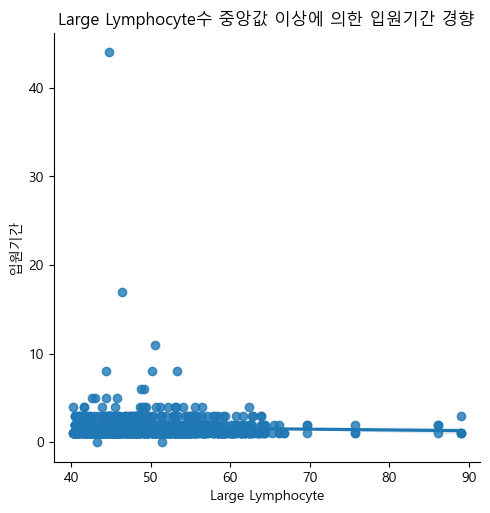

In [25]:
sns.lmplot(data=df_ROSF_L, x='Large Lymphocyte', y='입원기간',)
plt.title('Large Lymphocyte수 중앙값 이상에 의한 입원기간 경향')
plt.show()

#### 종양진행여부-입원기간
- 범주-연속
- 종양 진행이 없을때보다 있을 때 입원기간이 조금 늘어나는 것으로 보이나 이의 값의 variation이 크므로 검증이 필수



In [26]:
df_ROSF['종양진행여부'].value_counts()

0    1753
1       5
Name: 종양진행여부, dtype: int64

<Axes: xlabel='종양진행여부', ylabel='입원기간'>

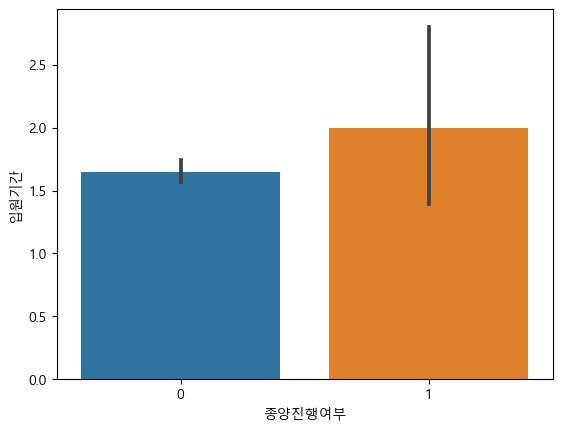

In [27]:
sns.barplot(data=df_ROSF, x='종양진행여부', y='입원기간', )

#### 디스크 단면적-입원기간
- 연속-연속

In [28]:
df_ROSF['디스크단면적'].describe()

count    1758.000000
mean     1989.023106
std       312.678694
min      1145.800000
25%      1777.500000
50%      1990.150000
75%      2177.120000
max      3166.140000
Name: 디스크단면적, dtype: float64

In [29]:
Q1_D = df_ROSF['디스크단면적'].describe()['25%']
Q3_D = df_ROSF['디스크단면적'].describe()['75%']
IQR_D = Q3_D-Q1_D
Q1_D, Q3_D , IQR_D

(1777.5, 2177.12, 399.6199999999999)

In [30]:
up_D = Q3_D + 1.5 *IQR_L
down_D = Q1_D - 1.5 *IQR_L
down_D, up_D

(1750.5375, 2204.0825)

In [31]:
condition_D = (down_D <= df_ROSF['디스크단면적']) & (df_ROSF['디스크단면적']<= up_D)
df_ROSF_D = df_ROSF[condition_D]

In [32]:
df_ROSF_D

,Unnamed: 0,환자ID,신장,체중,연령,성별,Large Lymphocyte,우울증여부,종양진행여부,재발여부,...,디스크위치,척추이동척도,척추전방위증,수술시간,수술실패여부,수술기법,흡연여부,Instability,혈액형,입원기간
0,0,1PT,163,60.3,66,2,22.8,0,0,0,...,4,Down,0,68.0,0,TELD,0,0,RH+A,2
1,1,2PT,171,71.7,47,1,44.9,0,0,0,...,4,Up,0,31.0,0,TELD,0,0,RH+A,1
3,3,4PT,174,74.2,40,1,54.7,0,0,0,...,4,Down,0,73.0,0,TELD,0,0,RH+O,1
4,4,5PT,183,80.7,42,1,53.8,0,0,0,...,4,Up,0,29.0,0,TELD,0,0,RH+A,2
5,5,6PT,164,60.8,60,2,28.5,0,0,0,...,4,Down,0,47.0,0,TELD,1,0,RH+AB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1839,1840PT,162,66.0,37,2,28.6,0,0,0,...,5,Middle,0,55.0,0,TELD,0,0,RH+B,1
1746,1841,1842PT,175,99.0,32,1,33.1,0,0,1,...,4,Middle,0,45.0,0,TELD,0,0,RH+A,1
1750,1849,1850PT,167,57.0,43,2,47.4,0,0,0,...,5,Middle,0,30.0,0,IELD,1,0,RH+A,2
1753,1870,1871PT,163,52.0,29,2,32.4,0,0,0,...,4,Middle,0,35.0,0,TELD,0,0,RH+O,12


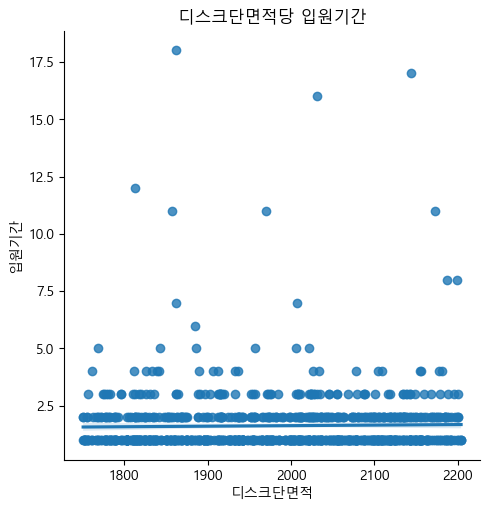

In [33]:
sns.lmplot(data=df_ROSF_D, x='디스크단면적', y='입원기간',)
plt.title('디스크단면적당 입원기간')
plt.show()

In [34]:
df_ROSF_D[['디스크단면적','입원기간']].corr()

,디스크단면적,입원기간
디스크단면적,1.000000,0.021878
입원기간,0.021878,1.000000


#### 척추이동척도-입원기간
- 범주-연속

In [35]:
df_ROSF['척추이동척도'].value_counts()

Middle            1177
Down               471
Up                  60
Extremely down      34
Extremely up        16
Name: 척추이동척도, dtype: int64

In [36]:
df_ROSF_M=pd.pivot_table(data=df_ROSF, index='척추이동척도', aggfunc=len)
df_ROSF_M['척추이동'] = df_ROSF_M.index
df_ROSF_M

,Instability,Large Lymphocyte,Unnamed: 0,디스크단면적,디스크위치,성별,수술기법,수술시간,수술실패여부,신장,...,우울증여부,입원기간,재발여부,종양진행여부,척추전방위증,체중,혈액형,환자ID,흡연여부,척추이동
척추이동척도,,,,,,,,,,,,,,,,,,,,,
Down,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,Down
Extremely down,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,Extremely down
Extremely up,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,Extremely up
Middle,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,...,1177,1177,1177,1177,1177,1177,1177,1177,1177,Middle
Up,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,Up


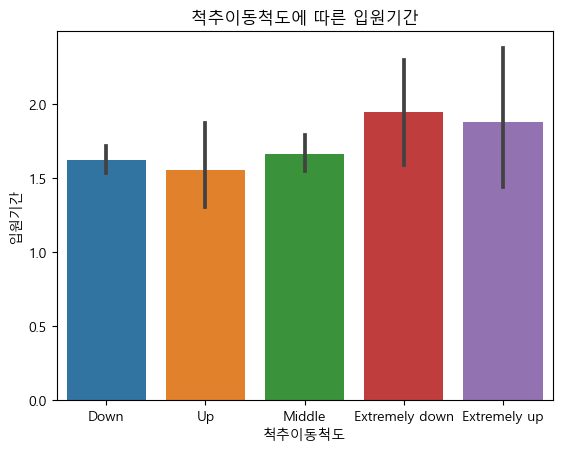

In [37]:
sns.barplot(data=df_ROSF, x='척추이동척도', y='입원기간')
plt.title('척추이동척도에 따른 입원기간')
plt.show()

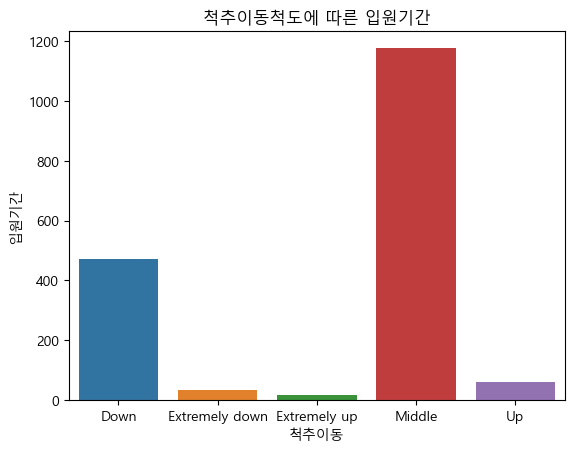

In [38]:
sns.barplot(data=df_ROSF_M, x='척추이동', y='입원기간')
plt.title('척추이동척도에 따른 입원기간')
plt.show()

#### 수술시간-입원기간
- 연속-연속

In [39]:
df_ROSF['수술시간'].describe()

count    1758.000000
mean       62.254835
std        25.075706
min         5.000000
25%        45.000000
50%        60.000000
75%        78.000000
max       220.000000
Name: 수술시간, dtype: float64

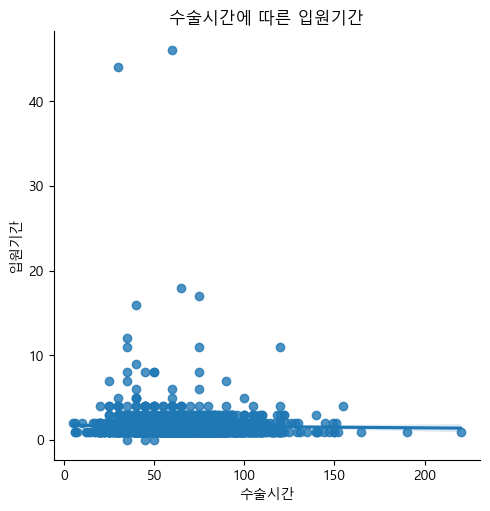

In [40]:
sns.lmplot(data=df_ROSF, x='수술시간', y='입원기간',)
plt.title('수술시간에 따른 입원기간')
plt.show()

In [41]:
df_ROSF[['수술시간','입원기간']].corr()

,수술시간,입원기간
수술시간,1.000000,-0.020495
입원기간,-0.020495,1.000000


#### 수술기법-입원기간
- 범주-연속

In [42]:
df_ROSF[['수술기법']].value_counts()

수술기법
TELD    1622
IELD     136
dtype: int64

<Axes: xlabel='수술기법', ylabel='입원기간'>

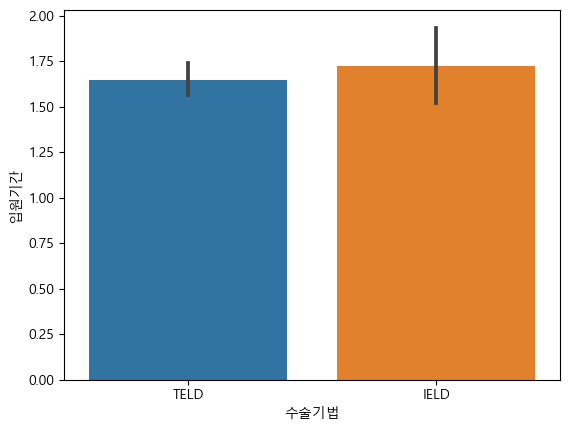

In [43]:
sns.barplot(data=df_ROSF, x='수술기법', y='입원기간')

#### Instability-입원기간
- 범주-연속

In [44]:
df_ROSF[['Instability']].value_counts()

Instability
0              1685
1                73
dtype: int64

<Axes: xlabel='Instability', ylabel='입원기간'>

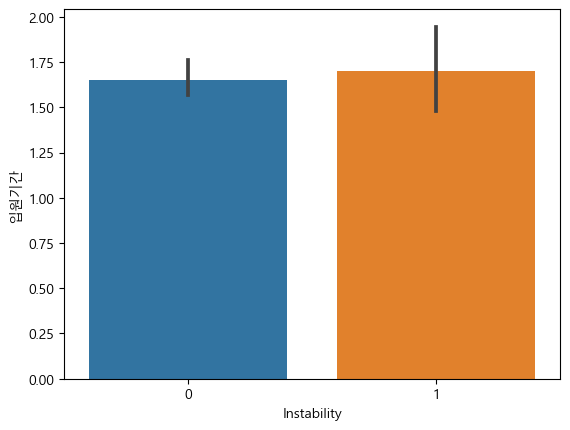

In [45]:
sns.barplot(data=df_ROSF, x='Instability', y='입원기간')

#### 혈액형-입원기간
- 범주-연속

In [46]:
df_ROSF[['혈액형']].value_counts()

혈액형  
RH+A     627
RH+O     502
RH+B     446
RH+AB    183
dtype: int64

<Axes: xlabel='혈액형', ylabel='입원기간'>

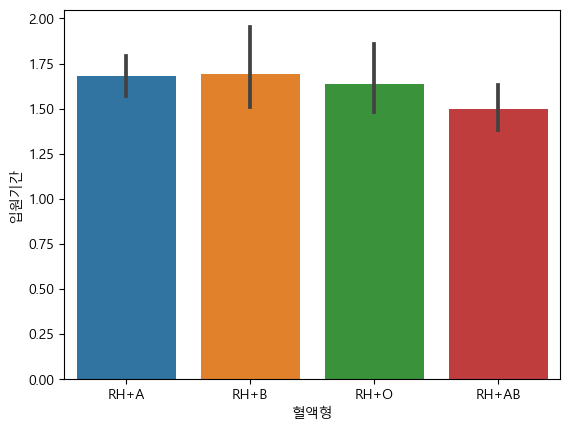

In [47]:
sns.barplot(data=df_ROSF, x='혈액형', y='입원기간')

#### 신장,체중-입원기간 or BMI
- 연속-연속/ 범주-연속

In [48]:
df_ROSF[['신장','체중']].describe()

,신장,체중
count,1758.000000,1758.000000
mean,168.065415,68.148407
std,9.161160,11.079244
min,140.000000,35.000000
25%,161.000000,59.800000
50%,169.000000,68.000000
75%,175.000000,75.000000
max,204.000000,136.100000


In [50]:
def convert (height) :
    return float(height)

df_ROSF['신장_소수']=df_ROSF['신장'].apply(convert)

In [53]:
def cm_convert(height):
    height = height / 100
    return height
df_ROSF['신장(m)']= df_ROSF['신장_소수'].apply(cm_convert)
df_ROSF['신장(m)^2'] = df_ROSF['신장(m)'] * df_ROSF['신장(m)']

In [55]:
df_ROSF['BMI'] = df_ROSF['체중'] / df_ROSF['신장(m)^2']

In [56]:
def BMI_calculation(BMI):
    if (BMI) < 18.5 :
        return '저체중'
    elif 18.5 <= (BMI) < 23 :
        return '정상체중'
    elif 23 <= (BMI) < 25 :
        return '과체중'
    elif 25 <= (BMI) < 30 :
        return '1단계비만'
    elif 30 <= (BMI) <35 : 
        return '2단계비만'
    elif 35 <= (BMI) : 
        return '고도비만'
    else :
        return '측정이상'

df_ROSF['BMI_범위'] = df_ROSF['BMI'].apply(BMI_calculation)

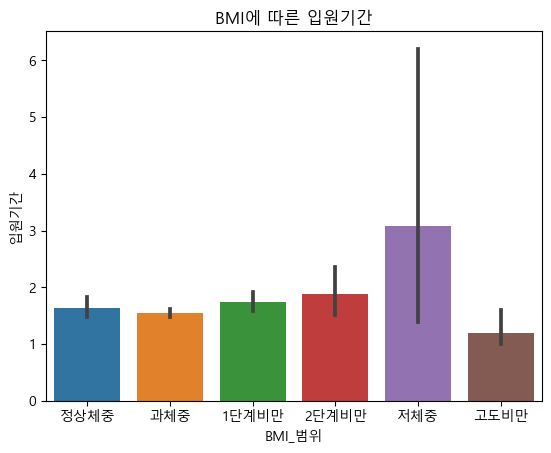

In [62]:
sns.barplot(data=df_ROSF, x='BMI_범위',y='입원기간')
plt.title('BMI에 따른 입원기간')
plt.show()